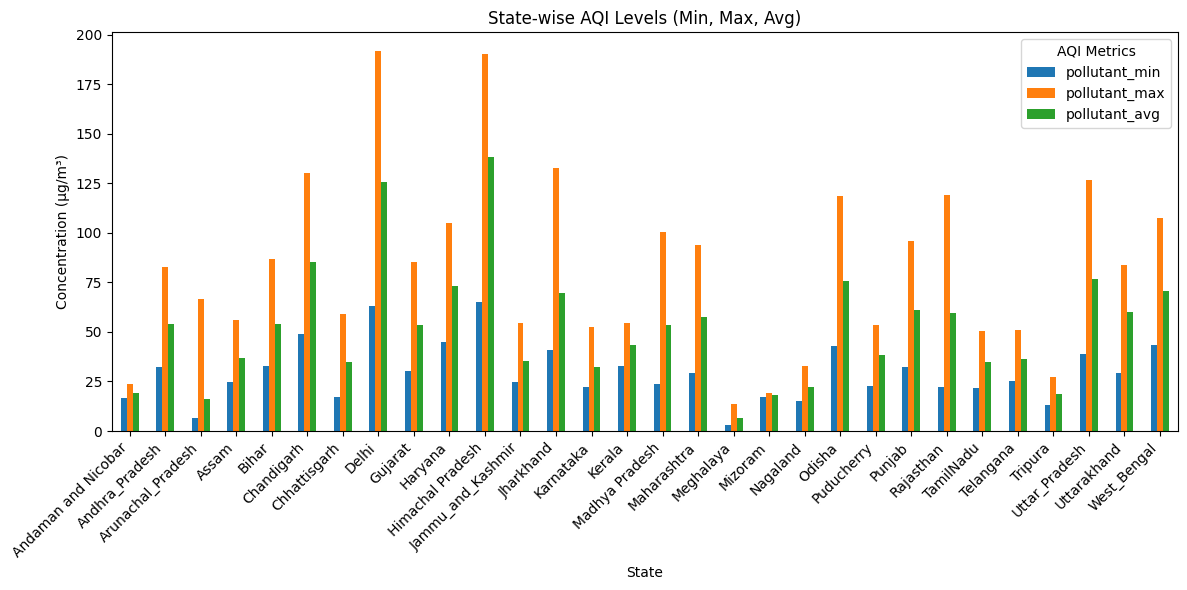

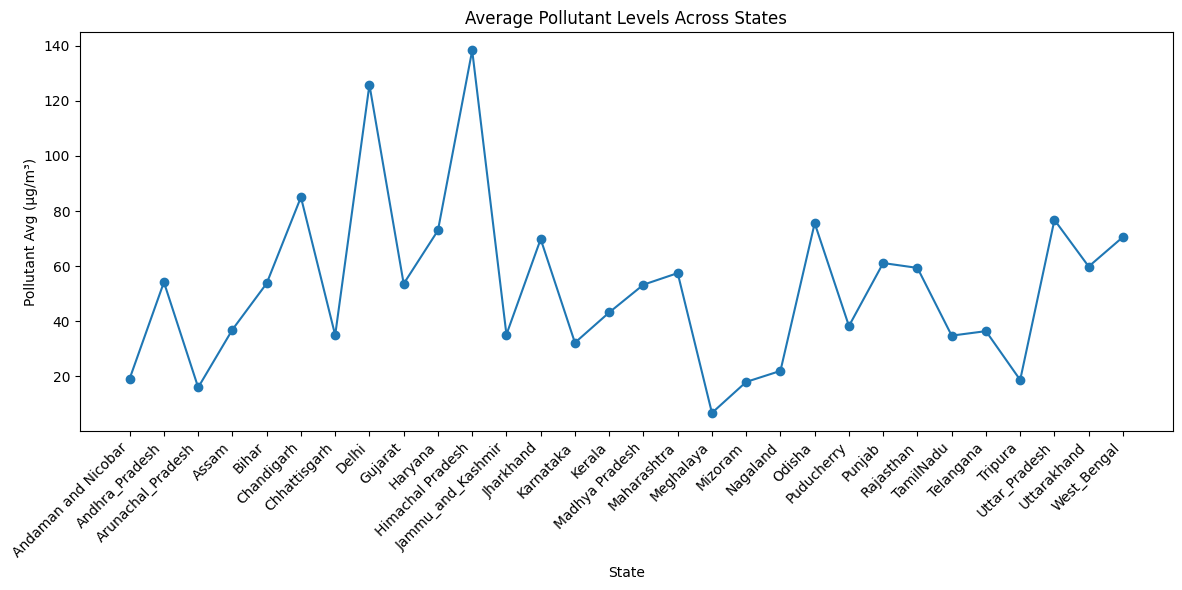

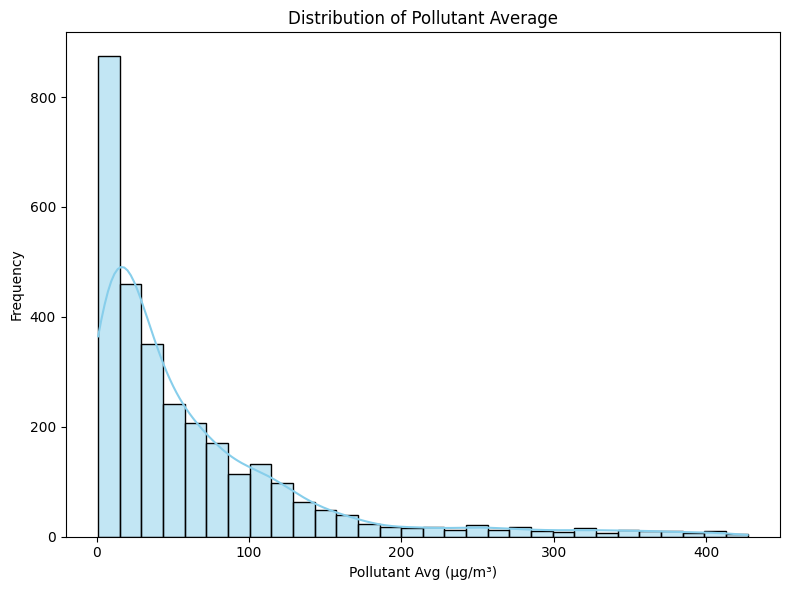

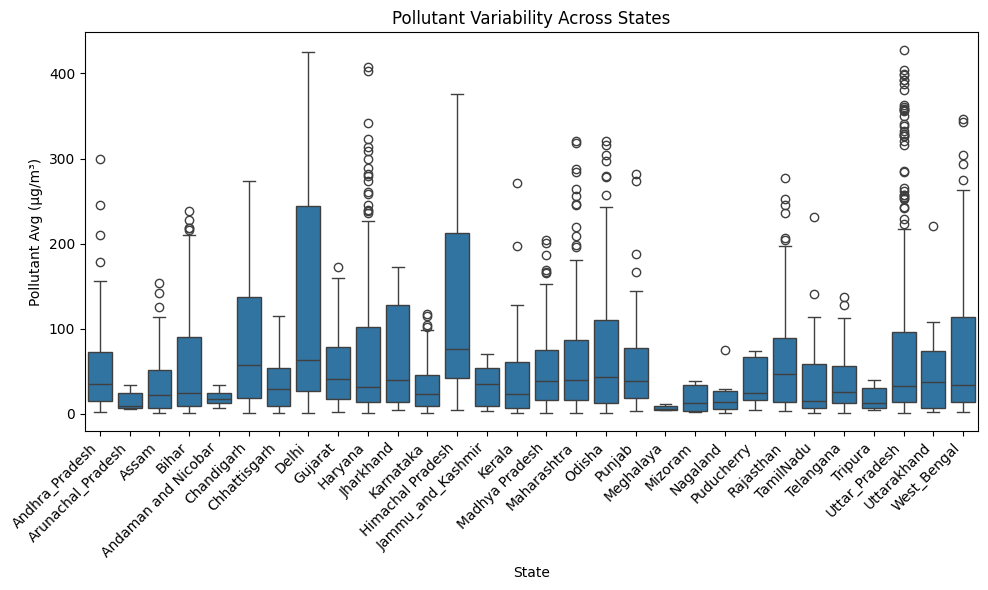

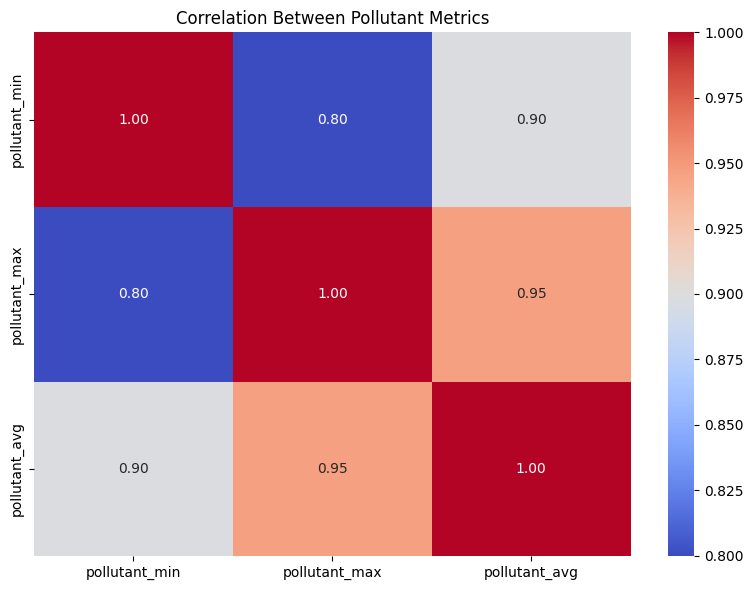

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
df = pd.read_csv(r"E:\Python\Real-time AQI.csv")

# Convert pollutant columns to numeric
for col in ["pollutant_min", "pollutant_max", "pollutant_avg"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# --- 1. Bar Chart: State-level AQI (min, max, avg) ---
state_pollutants = df.groupby("state")[["pollutant_min","pollutant_max","pollutant_avg"]].mean()

ax = state_pollutants.plot(kind="bar", figsize=(12,6))
plt.title("State-wise AQI Levels (Min, Max, Avg)")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("State")
plt.legend(title="AQI Metrics")

# Rotate labels for neatness
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- 2. Line Chart: Pollutant average trend across states ---
state_pollutants_avg = df.groupby("state")["pollutant_avg"].mean()
plt.figure(figsize=(12,6))
plt.plot(state_pollutants_avg.index, state_pollutants_avg.values, marker="o")
plt.title("Average Pollutant Levels Across States")
plt.xlabel("State")
plt.ylabel("Pollutant Avg (µg/m³)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- 3. Histogram: Distribution of pollutant_avg ---
plt.figure(figsize=(8,6))
sns.histplot(df["pollutant_avg"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Pollutant Average")
plt.xlabel("Pollutant Avg (µg/m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- 4. Box Plot: Pollutant variability across states ---
plt.figure(figsize=(10,6))
sns.boxplot(x="state", y="pollutant_avg", data=df)
plt.title("Pollutant Variability Across States")
plt.xlabel("State")
plt.ylabel("Pollutant Avg (µg/m³)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- 5. Correlation Heatmap: pollutant_min, max, avg ---
plt.figure(figsize=(8,6))
corr = df[["pollutant_min","pollutant_max","pollutant_avg"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutant Metrics")
plt.tight_layout()
plt.show()